<a href="https://colab.research.google.com/github/bernatsort/titanic_neural_networks/blob/main/Titanic_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv('train.csv')
# df_test = pd.read_csv('test.csv')
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
582,583,0,2,"Downton, Mr. William James",male,54.0,0,0,28403,26.0000,NaN,S
194,195,1,1,"Brown, Mrs. James Joseph (Margaret Tobin)",female,44.0,0,0,PC 17610,27.7208,B4,C
509,510,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,NaN,S
103,104,0,3,"Johansson, Mr. Gustaf Joel",male,33.0,0,0,7540,8.6542,NaN,S
553,554,1,3,"Leeni, Mr. Fahim (""Philip Zenni"")",male,22.0,0,0,2620,7.2250,NaN,C


In [ ]:
import pandas as pd
# Split the data into our train and test or train and validation data sets. 
# we use sklearn (library) and access to model_selection (the module) 
# to get the function train_test_split 
from sklearn.model_selection import train_test_split
# pickle is really useful for saving our model (all the parameters that are being saved).
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 


# Load the .csv
df = pd.read_csv('train.csv')

# The name is very long, so we can use the title: 
# So that might be a helpful indicator to whether someone survived or not with: Mr. and Mrs., Miss or other ones like that. 
def get_title(name):
    if '.' in name:
        return name.split(',')[1].split('.')[0].strip()
    else:
        return 'Unknown'

# There are a lot of titles. We should condense or reduce it.
def shorter_titles(x):
    title = x["Title"]
    # We can group those into Officer
    if title in ['Capt', 'Col', 'Major']:
        return 'Officer'
    # There are some for royalty: 
    elif title in ['Jonkheer', 'Don', 'the Countess', 'Dona', 'Lady', 'Sir']:
        return 'Royalty'
    elif title == 'Mme':
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    else: 
        return title
    
    
    
# we're going to be taking the actual titles from the names, 
# so we're going to be creating a new column and that will contain the only the titles from the names
df['Title'] = df['Name'].map(lambda x: get_title(x))
# apply: apply this function to all of the values in this column 
# axis=1 --> go down the column, not go along a row. 
df['Title'] = df.apply(shorter_titles, axis=1)
# getting the IDs
# ids = df['PassengerId']


# In this column, fill any of the NA or not applicable values, 
# and I just want to fill those with the median.
# inplace=True --> make that change happen.
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Embarked'].fillna("S", inplace=True)
# For 'Cabin', 'Ticket', 'Name'  I'm just going to be dropping it simply because 
# there were so many NA values, it is not very usefull, and we already have the title, respectively. 
df.drop("Cabin", axis=1, inplace=True)
df.drop("Ticket", axis=1, inplace=True)
df.drop("Name", axis=1, inplace=True)
# We have to change our categorical values into numeric values 
# because with our machine learning model, everything has to be a number.
df.Sex.replace(('male','female'), (0,1), inplace = True)
df.Embarked.replace(('S','C','Q'), (0,1,2), inplace = True)
df.Title.replace(('Mr','Miss','Mrs','Master','Dr','Rev','Officer','Royalty'), (0,1,2,3,4,5,6,7), inplace = True)



# Split the data frame into X and Y
# Y: dependent variable
y = df['Survived']
# X: independent variable
# df.drop: I take all the data frame except the columns I've dropped. 
# axis = 1: I want to drop the whole column, not the row.
X = df.drop(['Survived', 'PassengerId'], axis=1)
# First of all, we're creating variables.
    # (write them in this order)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# Store the model (randomforest)
randomforest = RandomForestClassifier()
# .fit(): I have my model. It doesn't have any parameters. It hasn't ever seen any data.
#         Now I want you to train it. It's going to be essentially training.
randomforest.fit(X_train, y_train)
# I want make predictions, and see if my y validation is accurate or not.
y_pred = randomforest.predict(X_test)

# Calculating the accuracy: taking an accuracy score.
# Putting in the y predictions, comparing them to the actual ground truth, 
# which is what we have in the data (y_test). 
acc_randomforest = round(accuracy_score(y_pred, y_test)*100, 2)
# Print out the accuracy 
print("Accuracy: {}".format(acc_randomforest))



Accuracy: 77.78


### Optimized titanic neural network 


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

epochs=500
batch_size = 50 
verbose = 1
validation_split = 0.06


model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(8,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
 
# this metrics key in the following line has to match train.history below
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) 
 
model_train = model.fit(X, y, epochs=epochs, batch_size=batch_size, verbose=verbose, validation_split=validation_split)
 
plt.plot(model_train.history['accuracy'], label='train')
plt.plot(model_train.history['val_accuracy'], label='test')
plt.title('Model accuracy')
plt.xlabel('Epoch number')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


##### Adding dropout layers to reduce overfitting

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

epochs=500
batch_size = 50 
verbose = 1 
validation_split = 0.06


model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(8,)))
model.add(Dropout(rate=0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
 
# this metrics key in the following line has to match train.history below
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) 
 
model_train = model.fit(X, y, epochs=epochs, batch_size=batch_size, verbose=verbose, validation_split=validation_split)
 
plt.plot(model_train.history['accuracy'], label='train')
plt.plot(model_train.history['val_accuracy'], label='test')
plt.title('Model accuracy')
plt.xlabel('Epoch number')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

##### Reducing the complexity of the model 


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

epochs=500
batch_size = 50 
verbose = 1
validation_split = 0.06


model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(8,)))
model.add(Dropout(rate=0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.1))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
 
# this metrics key in the following line has to match train.history below
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) 
 
model_train = model.fit(X, y, epochs=epochs, batch_size=batch_size, verbose=verbose, validation_split=validation_split)
 
plt.plot(model_train.history['accuracy'], label='train')
plt.plot(model_train.history['val_accuracy'], label='test')
plt.title('Model accuracy')
plt.xlabel('Epoch number')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

#### Saving the model

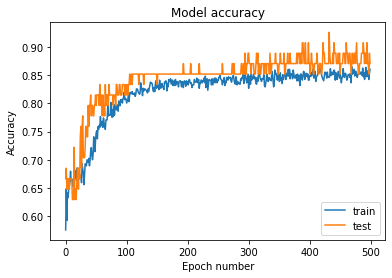

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

epochs=500
batch_size = 50 
verbose = 0
validation_split = 0.06


model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(8,)))
model.add(Dropout(rate=0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
 
# this metrics key in the following line has to match train.history below
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) 
 
model_train = model.fit(X, y, epochs=epochs, batch_size=batch_size, verbose=verbose, validation_split=validation_split)
 
plt.plot(model_train.history['accuracy'], label='train')
plt.plot(model_train.history['val_accuracy'], label='test')
plt.title('Model accuracy')
plt.xlabel('Epoch number')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# To save the model once it has been trained 
model.save('titanic_NN.h5')

#### Load the model 

In [ ]:
# when we're playing around with neural networks we need to put it into the correct data format, which is a numpy array.
import numpy as np
# So when you're saving a model, you don't actually need to import anything but load the model (load_model).
from keras.models import load_model
# Load up the model 
model_predict = load_model('titanic_NN.h5')

#### Make a prediction

In [ ]:
# When we make predictions through Keras, we need to cast that into an numpy array:
    # Pclass Sex Age SibSp Parch Fare Embarked Title
x_example = np.array([[1,1,30,2,2,50,1,2]])

# Run a prediction
prediction_num = model_predict.predict(x_example)
print(prediction_num)

if prediction_num < 0.5:
    prediction = 'Not survived'
else: 
    prediction = 'Survived'
    
print(prediction)

[[0.9749645]]
Survived
